## PLANT SEEDLING CLASSIFICATION- IMAGE CLASSIFICATION


## Kaggle

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

# Import dataset from kaggle into google colab

!kaggle competitions download -c plant-seedlings-classification
!unzip -q train.zip -d ./train



kaggle.json
  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 2.10MB/s]
 76% 65.0M/86.0M [00:01<00:00, 39.1MB/s]
100% 86.0M/86.0M [00:01<00:00, 63.5MB/s]
100% 1.60G/1.60G [00:20<00:00, 128MB/s]
100% 1.60G/1.60G [00:20<00:00, 82.8MB/s]


### Unzip files

## Data Manipulation
### Load and pre-process data

In [0]:
import cv2
import glob
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
import numpy as np
import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Input
from keras import layers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, \
                                       ZeroPadding2D,Conv2D
from keras import backend as K
from keras.optimizers import SGD, RMSprop
from keras.layers.normalization import BatchNormalization

np.random.seed(2016)
use_cache = 1
# color type: 1 - grey, 3 - rgb
color_type_global = 3
num_classes = 12
img_rows = 224
img_cols = 224
classes = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen", "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"]


Using TensorFlow backend.


In [0]:



def get_image(path, img_rows, img_cols, color_type=1):
    # Load as grayscale
    if color_type == 1:
        img = cv2.imread(path, 0)
    elif color_type == 3:
        img = cv2.imread(path)
    # resize - reduce size
    resized = cv2.resize(img, (img_cols, img_rows))
    return resized

def load_data(img_rows, img_cols, color_type=1):
    X_train = []
    y_train = []
    print('Loading data:')
    for index, c in enumerate(classes):
        print('Read images from folder name {}'.format(c))
        path = os.path.join('./train', 'train',
                            str(c), '*.png')
        files = glob.glob(path)
        for fl in files:
            img = get_image(fl, img_rows, img_cols, color_type)
            X_train.append(img)
            y_train.append(index)
    return X_train, y_train




In [0]:

images , labels = load_data(img_rows, img_cols, color_type_global)
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

Loading data:
Read images from folder name Black-grass
Read images from folder name Charlock
Read images from folder name Cleavers
Read images from folder name Common Chickweed
Read images from folder name Common wheat
Read images from folder name Fat Hen
Read images from folder name Loose Silky-bent
Read images from folder name Maize
Read images from folder name Scentless Mayweed
Read images from folder name Shepherds Purse
Read images from folder name Small-flowered Cranesbill
Read images from folder name Sugar beet
(4750, 224, 224, 3)
(4750,)


### Create train, validation and test sets
here we divide the dataset into train, test and validation sets, the ditribution is as follows:

Training Data => 80% of total dataset 

Testing Data => 20% of total dataset

Validation Data => 20% of training dataset

In [0]:

images_train_test, images_val, labels_train_test, labels_val = train_test_split(images, labels, test_size= 0.2, random_state = 42)
images_train_test = np.asarray(images_train_test)
images_val = np.asarray(images_val)
labels_train_test = np.asarray(labels_train_test)
labels_val = np.asarray(labels_val)
print(images_train_test.shape)
print(images_val.shape)

images_train, images_test, labels_train, labels_test = train_test_split(images_train_test, labels_train_test, test_size= 0.2, random_state = 42)
images_train = np.asarray(images_train)
images_test = np.asarray(images_test)
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)
print(images_train.shape)
print(images_test.shape)

labels_train = keras.utils.to_categorical(labels_train, num_classes)
labels_val = keras.utils.to_categorical(labels_val, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)

(3800, 224, 224, 3)
(950, 224, 224, 3)
(3040, 224, 224, 3)
(760, 224, 224, 3)


## Model
### Build a Model
Here we create our training model, namely, "**simplified VGG net**" while below mentioned specifications

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout 
from keras.layers.core import Dense


batch_size = 32
epochs = 50

input_shape = (img_rows, img_cols, color_type_global)

model = Sequential()

# CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
  # (CONV => RELU) * 2 => POOL
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

  # (CONV => RELU) * 2 => POOL
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

  # first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

  # *sigmoid* activation for multi-label classification
model.add(Dense(num_classes))
model.add(Activation("sigmoid"))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the model
The model is compiled using the below mentioned specifications:

In [0]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.00, decay=0.00 ), loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model

In [0]:
history = model.fit(images_train, labels_train, batch_size=batch_size,
                      epochs=epochs, verbose=1,
                      validation_data=(images_val, labels_val))
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3040 samples, validate on 950 samples
Epoch 1/50
3040/3040 [==============================] - 24s 8ms/step - loss: 2.5452 - acc: 0.1477 - val_loss: 2.2706 - val_acc: 0.2200
Epoch 2/50
3040/3040 [==============================] - 18s 6ms/step - loss: 2.2067 - acc: 0.2628 - val_loss: 2.1146 - val_acc: 0.2653
Epoch 3/50
3040/3040 [==============================] - 18s 6ms/step - loss: 2.0411 - acc: 0.3168 - val_loss: 2.0925 - val_acc: 0.2853
Epoch 4/50
3040/3040 [==============================] - 18s 6ms/step - loss: 1.9637 - acc: 0.3829 - val_loss: 2.0578 - val_acc: 0.2874
Epoch 5/50
3040/3040 [==============================] - 18s 6ms/step - loss: 1.8920 - acc: 0.3914 - val_loss: 1.9671 - val_acc: 0.3284
Epoch 6/50
3040/3040 [==============================] - 18s 6ms/step - loss: 1.8671 - acc: 0.4082 - val_loss: 2.2513 - val_acc: 0.2505
Epoch 7/50
3040/3040 [=========================

### Plot results - training vs validation

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.14769736842105263, 0.26282894736842105, 0.3167763157894737, 0.3828947368421053, 0.39144736842105265, 0.4082236842105263, 0.41546052631578945, 0.45592105263157895, 0.4621710526315789, 0.47730263157894737, 0.4861842105263158, 0.5036184210526315, 0.5013157894736842, 0.5256578947368421, 0.5148026315789473, 0.5421052631578948, 0.5523026315789473, 0.5509868421052632, 0.562828947368421, 0.5661184210526315, 0.5914473684210526, 0.5950657894736842, 0.594078947368421, 0.6069078947368421, 0.6078947368421053, 0.6240131578947369, 0.6286184210526315, 0.6302631578947369, 0.6388157894736842, 0.649671052631579, 0.6523026315789474, 0.6523026315789474, 0.6743421052631579, 0.6782894736842106, 0.68125, 0.6891447368421053, 0.6786184210526316, 0.6865131578947369, 0.7052631578947368, 0.6904605263157895, 0.7006578947368421, 0.7088815789473685, 0.7023026315789473, 0.7078947368421052, 0.7151315789473685, 0.7233552631578948, 0.7322368421052632, 0.722697368421052

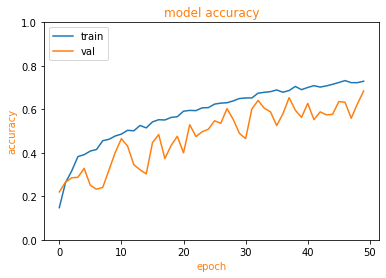

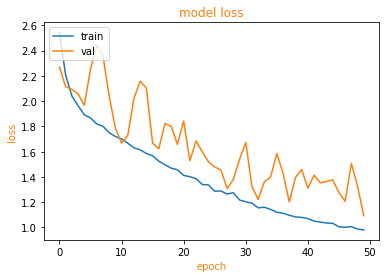

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])



plt.plot(history.history['acc'],  scaley=False)
plt.plot(history.history['val_acc'], scaley=False)
plt.title('model accuracy', color ='C1')
plt.ylabel('accuracy', color ='C1')
plt.xlabel('epoch', color ='C1')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss`+a
plt.plot(history.history['loss'], scaley=False)
plt.plot(history.history['val_loss'])
plt.title('model loss', color ='C1')
plt.ylabel('loss', color ='C1')
plt.xlabel('epoch', color ='C1')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

### Evaluate the model - On test set

In [0]:
score = model.evaluate(images_test, labels_test, verbose=0)
label_score = model.predict(images_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0794102417795282
Test accuracy: 0.6815789479958384


### Visualize performance on test images

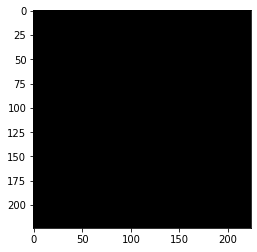

Predicted class is:  Small-flowered Cranesbill
Original class is:  Small-flowered Cranesbill


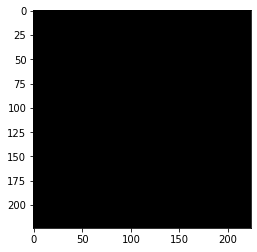

Predicted class is:  Fat Hen
Original class is:  Fat Hen


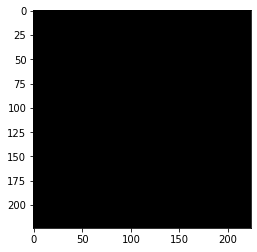

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


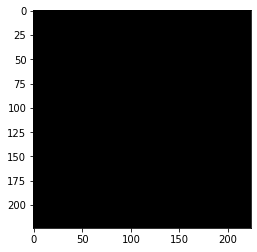

Predicted class is:  Fat Hen
Original class is:  Fat Hen


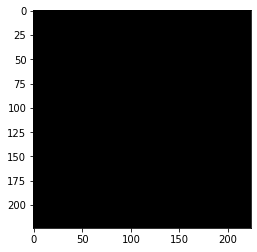

Predicted class is:  Common wheat
Original class is:  Sugar beet


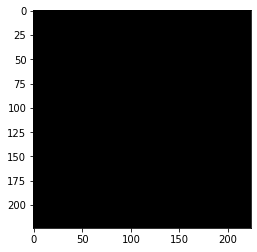

Predicted class is:  Loose Silky-bent
Original class is:  Scentless Mayweed


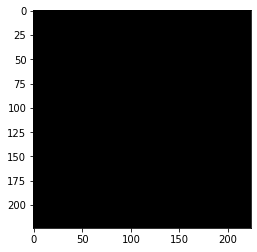

Predicted class is:  Cleavers
Original class is:  Cleavers


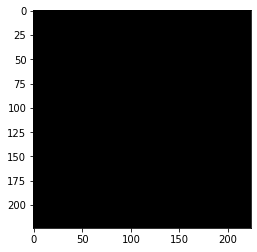

Predicted class is:  Common wheat
Original class is:  Common wheat


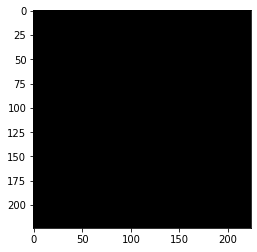

Predicted class is:  Loose Silky-bent
Original class is:  Loose Silky-bent


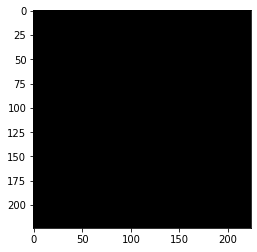

Predicted class is:  Loose Silky-bent
Original class is:  Loose Silky-bent


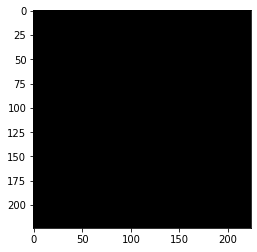

Predicted class is:  Shepherds Purse
Original class is:  Shepherds Purse


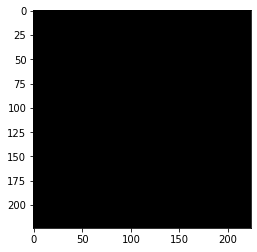

Predicted class is:  Charlock
Original class is:  Charlock


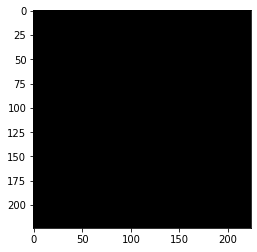

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


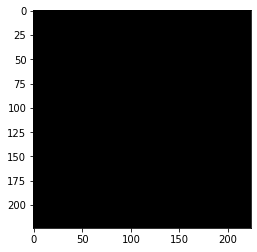

Predicted class is:  Charlock
Original class is:  Small-flowered Cranesbill


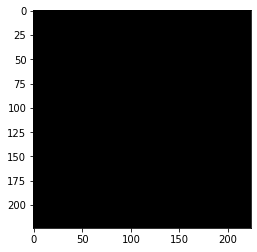

Predicted class is:  Loose Silky-bent
Original class is:  Small-flowered Cranesbill


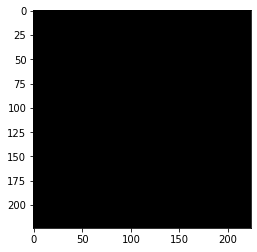

Predicted class is:  Common wheat
Original class is:  Charlock


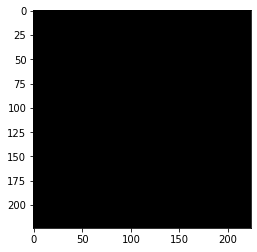

Predicted class is:  Fat Hen
Original class is:  Fat Hen


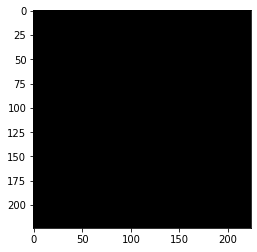

Predicted class is:  Charlock
Original class is:  Charlock


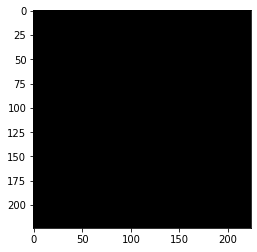

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


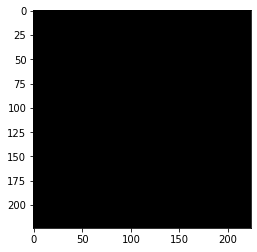

Predicted class is:  Scentless Mayweed
Original class is:  Scentless Mayweed


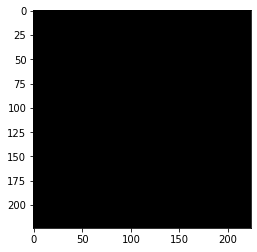

Predicted class is:  Cleavers
Original class is:  Shepherds Purse


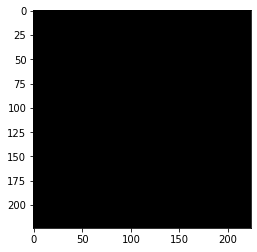

Predicted class is:  Sugar beet
Original class is:  Sugar beet


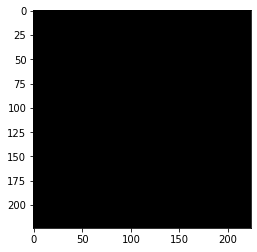

Predicted class is:  Fat Hen
Original class is:  Scentless Mayweed


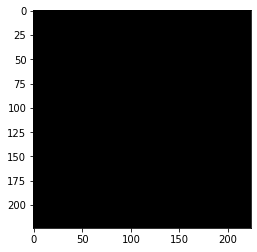

Predicted class is:  Loose Silky-bent
Original class is:  Black-grass


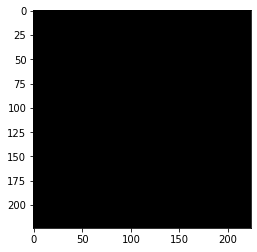

Predicted class is:  Loose Silky-bent
Original class is:  Black-grass


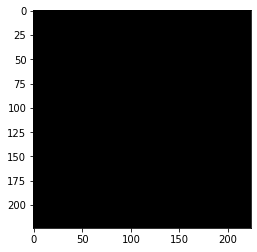

Predicted class is:  Scentless Mayweed
Original class is:  Scentless Mayweed


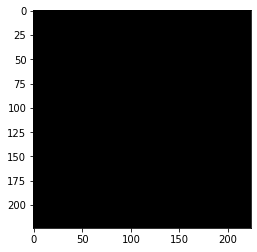

Predicted class is:  Cleavers
Original class is:  Cleavers


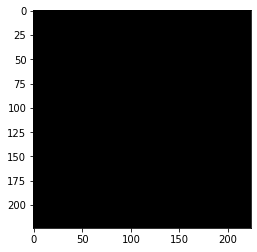

Predicted class is:  Fat Hen
Original class is:  Shepherds Purse


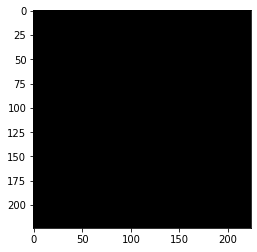

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


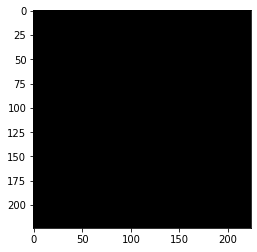

Predicted class is:  Black-grass
Original class is:  Common wheat


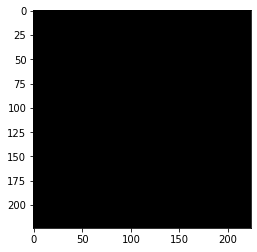

Predicted class is:  Loose Silky-bent
Original class is:  Scentless Mayweed


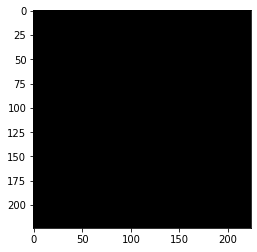

Predicted class is:  Common wheat
Original class is:  Common wheat


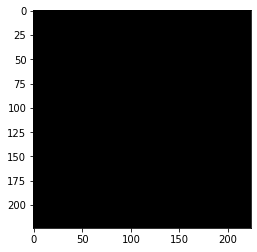

Predicted class is:  Common wheat
Original class is:  Sugar beet


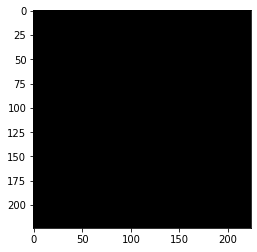

Predicted class is:  Loose Silky-bent
Original class is:  Scentless Mayweed


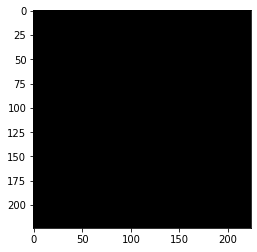

Predicted class is:  Loose Silky-bent
Original class is:  Loose Silky-bent


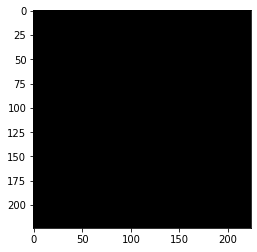

Predicted class is:  Shepherds Purse
Original class is:  Shepherds Purse


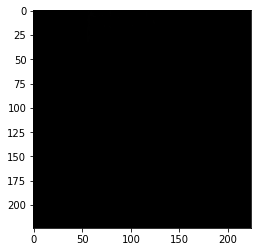

Predicted class is:  Black-grass
Original class is:  Sugar beet


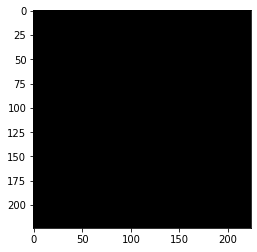

Predicted class is:  Loose Silky-bent
Original class is:  Loose Silky-bent


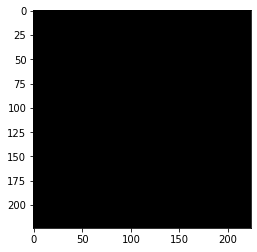

Predicted class is:  Fat Hen
Original class is:  Fat Hen


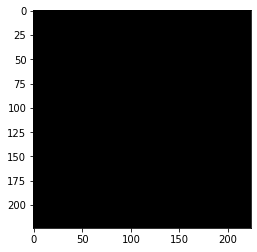

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


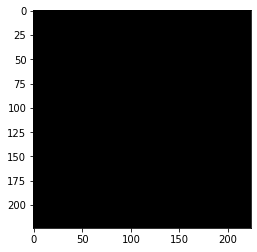

Predicted class is:  Loose Silky-bent
Original class is:  Loose Silky-bent


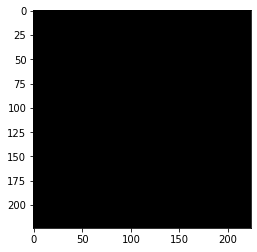

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


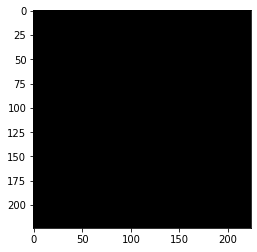

Predicted class is:  Scentless Mayweed
Original class is:  Scentless Mayweed


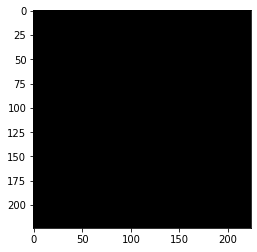

Predicted class is:  Small-flowered Cranesbill
Original class is:  Small-flowered Cranesbill


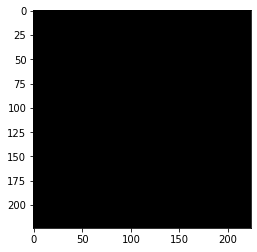

Predicted class is:  Fat Hen
Original class is:  Fat Hen


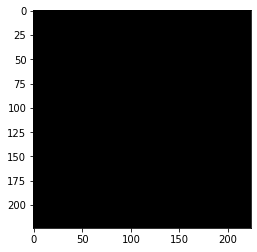

Predicted class is:  Fat Hen
Original class is:  Maize


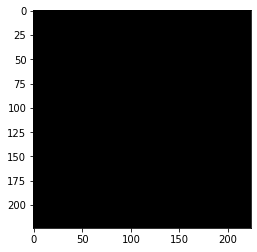

Predicted class is:  Fat Hen
Original class is:  Shepherds Purse


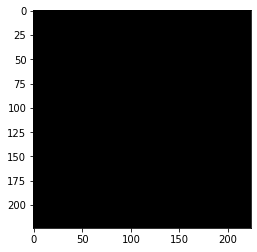

Predicted class is:  Common wheat
Original class is:  Fat Hen


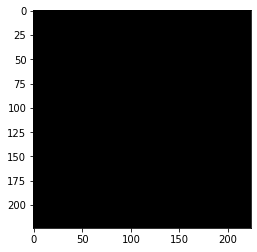

Predicted class is:  Small-flowered Cranesbill
Original class is:  Black-grass


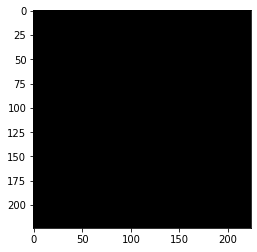

Predicted class is:  Common Chickweed
Original class is:  Common Chickweed


In [0]:
from keras.preprocessing import image

count = 0
for img, label in zip(images_test, labels_test):
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    plt.imshow(img_tensor[0])
    plt.show()
    lab = label.argmax() 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    test_images = np.vstack([x])
    pred_class = model.predict_classes(test_images, batch_size=10)
    print("Predicted class is: ",classes[pred_class[0]])
    print("Original class is: ", classes[lab])
    count +=1
    if count == 50:
        break